In [1]:
import struct, gzip
import scipy.io
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import time


In [2]:
# Credit : https://github.com/daniel-e/mnist_octave
# Load Data Set

def loadY(fnlabel):
	f = gzip.open(fnlabel, 'rb')
	f.read(8)
	return np.frombuffer(f.read(), dtype = np.uint8)

def loadX(fnimg):
	f = gzip.open(fnimg, 'rb')
	f.read(16)
	return np.frombuffer(f.read(), dtype = np.uint8).reshape((-1, 28*28))

trainX = loadX("train-images-idx3-ubyte.gz")
trainY = loadY("train-labels-idx1-ubyte.gz")

testX = loadX("t10k-images-idx3-ubyte.gz")
testY = loadY("t10k-labels-idx1-ubyte.gz")

data = {"trainX": trainX, "trainY": trainY, "testX": testX, "testY": testY}
scipy.io.savemat("mnist.mat", data, do_compression = True)

data = sio.loadmat("mnist.mat")

train_X = data['trainX']  # shape = (60000, 768)
train_Y = data['trainY'][0]  # shape = (1, 60000)

test_X = data['testX']  # shape = (60000, 768)
test_Y = data['testY'][0]  # shape = (1, 60000)

In [3]:
# Train Model
start = time.time()
knn = KNeighborsClassifier(n_neighbors=1).fit(train_X,train_Y)
end = time.time()
print('Time required for training : ',(end - start))

Time required for training :  34.53469681739807


In [4]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
# Predict
predicted = knn.predict(test_X)

In [6]:
print('Accurancy : ',accuracy_score(test_Y,predicted))

Accurancy :  0.9691


Text(69.0, 0.5, 'Truth')

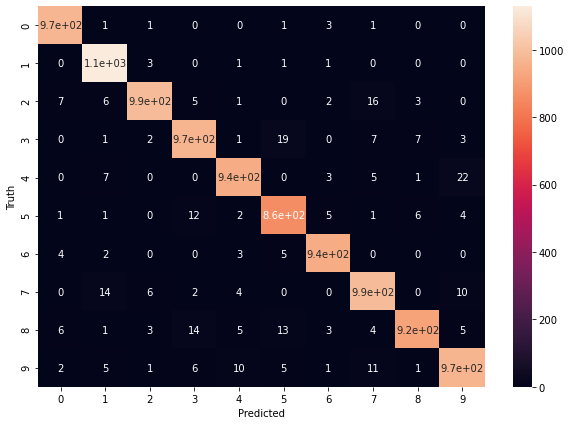

In [7]:
cm = confusion_matrix(test_Y,predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [8]:
print(classification_report(test_Y,predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [10]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(knn, 'saved_model.pkl')

['saved_model.pkl']